TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

y : CDRGLOB
X : all columns except for the label
Train-test split: .80-.20 (please use the stratify parameter)
Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.


In [3]:
import pandas as pd
data=pd.read_excel('Temporary_data3_Left_Right_Copy.xlsx')
data

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,20,1,1,1,1,1,0,0,0,...,24.6892,2.6528,10.5460,2.1712,14.1128,2.8833,9.3176,2.3582,0.6735,1.0270
1350,1,16,1,2,1,0,1,0,0,0,...,24.7908,2.0993,10.4094,1.4855,10.7880,1.9027,10.2034,2.0484,0.7267,0.7946
1351,2,14,2,1,1,1,1,0,0,0,...,23.8500,2.1200,12.3900,1.5300,12.6600,1.9900,9.4800,1.7400,1.1800,1.5900
1352,2,20,3,1,1,1,1,25,0,0,...,31.3500,2.4300,10.8200,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200


In [4]:
Y=data['CDRGLOB']
X=data.drop(['CDRGLOB'], axis=1)

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model=GaussianNB()

In [6]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, Y, random_state=0,train_size=0.8)

In [7]:
from sklearn.model_selection import cross_val_score
for i in (5,10):
  scores=cross_val_score(model, X1, y1, cv=i)
  print("k={k} için ortalama skor: {skor}".format(k=i,skor=scores.mean()))

k=5 için ortalama skor: 0.6047064345451443
k=10 için ortalama skor: 0.6010703363914374


K değeri arttıkça ortalama skor değeri düştü.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()
model.fit(X1, y1)  
                                                
y_model2 = model.predict(X2)                                                    
param_grid = {'max_depth': [1,3,5,11,22],                                       
              'random_state': [0,4,6,7,12],
              'max_leaf_nodes' : [3,4,7,11,21]}
grid = GridSearchCV(model, param_grid, cv=10) 
grid.fit(X1, y1) 
print(grid.best_params_)
best_grid = grid.best_estimator_  
grid_best = best_grid.fit(X1, y1).predict(X2)
print("Accuracy score of default parameters: ",accuracy_score(y2,y_model2))
print("Accuracy score fof best parameters: ",accuracy_score(y2,grid_best))

{'max_depth': 5, 'max_leaf_nodes': 7, 'random_state': 0}
Accuracy score of default parameters:  0.6383763837638377
Accuracy score fof best parameters:  0.7084870848708487


TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels (separately for true labels and predicted labels in 2 different graphs). For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

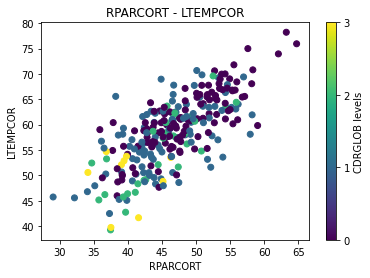

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X2["RPARCORT"], X2["LTEMPCOR"],c=y2)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions.

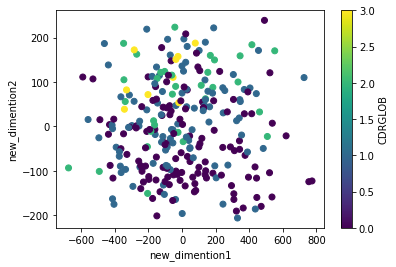

In [28]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
fit_model = model.fit_transform(X2)
plt.scatter(fit_model[:,0], fit_model[:,1], c=y2)

plt.colorbar(label="CDRGLOB")
plt.xlabel ("new_dimention1")
plt.ylabel ("new_dimention2")
plt.clim(0, 3);

TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education.

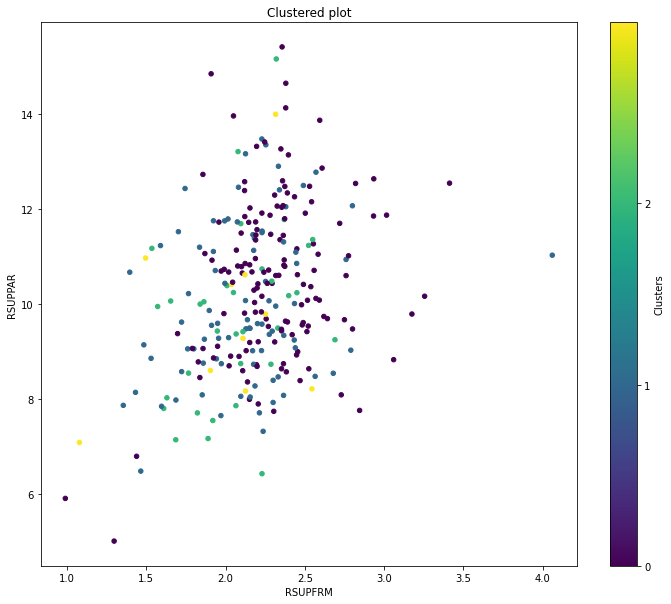

In [35]:
plt.figure(figsize=(12, 10))
plt.scatter(X2["RSUPFRM"], X2["RSUPPAR"],c=y_model2, s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.xlabel("RSUPFRM")
plt.ylabel("RSUPPAR")
plt.show();